# Data

In [21]:
!wget https://raw.githubusercontent.com/iDataVisualizationLab/V/master/globalsoilspectral/data/ASD%20Spectra.csv
!wget https://raw.githubusercontent.com/iDataVisualizationLab/V/master/globalsoilspectral/data/Chemical_properties.csv
!wget https://raw.githubusercontent.com/iDataVisualizationLab/V/master/globalsoilspectral/data/ICRAF%20sample%20codes.csv

--2021-03-14 15:11:55--  https://raw.githubusercontent.com/iDataVisualizationLab/V/master/globalsoilspectral/data/ASD%20Spectra.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9414958 (9.0M) [text/plain]
Saving to: ‘ASD Spectra.csv.2’

ASD Spectra.csv.2   100%[===================>]   8.98M  28.8MB/s    in 0.3s    

2021-03-14 15:11:56 (28.8 MB/s) - ‘ASD Spectra.csv.2’ saved [9414958/9414958]

--2021-03-14 15:11:56--  https://raw.githubusercontent.com/iDataVisualizationLab/V/master/globalsoilspectral/data/Chemical_properties.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP 

# Basic Imports

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading and cleaning data

In [23]:
# Load related tables
asdspectra = pd.read_csv('ASD Spectra.csv')
chemicalproperties = pd.read_csv('Chemical_properties.csv')
sample_codes = pd.read_csv('ICRAF sample codes.csv')

In [24]:
asdspectra

,Batch_Labid,W350,W360,W370,W380,W390,W400,W410,W420,W430,W440,W450,W460,W470,W480,W490,W500,W510,W520,W530,W540,W550,W560,W570,W580,W590,W600,W610,W620,W630,W640,W650,W660,W670,W680,W690,W700,W710,W720,W730,...,W2110,W2120,W2130,W2140,W2150,W2160,W2170,W2180,W2190,W2200,W2210,W2220,W2230,W2240,W2250,W2260,W2270,W2280,W2290,W2300,W2310,W2320,W2330,W2340,W2350,W2360,W2370,W2380,W2390,W2400,W2410,W2420,W2430,W2440,W2450,W2460,W2470,W2480,W2490,W2500
0,FS15R_FS4076,0.087266,0.072293,0.067882,0.071278,0.070909,0.075602,0.078873,0.082193,0.088196,0.095674,0.101212,0.104456,0.106206,0.109092,0.114543,0.122153,0.130520,0.139305,0.148921,0.160352,0.173517,0.188158,0.202385,0.216380,0.228096,0.237501,0.244517,0.249698,0.256105,0.268447,0.279479,0.288520,0.297395,0.305936,0.314559,0.323099,0.331375,0.339592,0.347249,...,0.519317,0.518384,0.514404,0.496399,0.459535,0.430382,0.423086,0.420313,0.409079,0.379284,0.364986,0.433877,0.454211,0.452652,0.458378,0.457573,0.452615,0.445290,0.438905,0.431135,0.421891,0.416573,0.417749,0.417197,0.407596,0.402104,0.398858,0.387039,0.388728,0.395198,0.394691,0.388342,0.378323,0.363643,0.355189,0.350998,0.347304,0.339293,0.336794,0.342761
1,FS15R_FS4077,0.091761,0.070822,0.069020,0.070133,0.072216,0.076107,0.079003,0.083118,0.089067,0.096771,0.103107,0.105988,0.107979,0.110931,0.116431,0.125237,0.134554,0.144735,0.156168,0.170303,0.187658,0.207710,0.227991,0.248805,0.266659,0.280102,0.289091,0.293368,0.299805,0.319084,0.335170,0.346745,0.357195,0.367171,0.377053,0.386889,0.396319,0.405741,0.414290,...,0.519921,0.517751,0.512000,0.489625,0.444973,0.410742,0.402429,0.399659,0.387248,0.354411,0.340413,0.416946,0.440131,0.438598,0.446498,0.446585,0.440995,0.432286,0.424802,0.416039,0.404386,0.398874,0.398748,0.396987,0.385835,0.380139,0.376023,0.364195,0.364554,0.371276,0.372140,0.364686,0.353332,0.338953,0.333400,0.325874,0.324145,0.326207,0.326426,0.330889
2,FS15R_FS4078,0.089091,0.069347,0.069658,0.068196,0.070051,0.071531,0.072116,0.075222,0.080212,0.087152,0.093085,0.095493,0.097029,0.099638,0.104889,0.113026,0.121667,0.131200,0.142452,0.157581,0.177754,0.203467,0.232495,0.263682,0.291163,0.312686,0.326263,0.332120,0.339186,0.361279,0.378810,0.390476,0.401068,0.411544,0.422255,0.433325,0.444342,0.455127,0.464832,...,0.490392,0.486869,0.478469,0.450335,0.399170,0.361083,0.351953,0.348918,0.336828,0.303044,0.289463,0.370583,0.396118,0.394445,0.405039,0.405620,0.399241,0.389894,0.381095,0.370493,0.357650,0.350486,0.349664,0.347391,0.334429,0.328155,0.322192,0.310103,0.310708,0.318046,0.317970,0.311350,0.300105,0.286626,0.280191,0.276309,0.276022,0.268724,0.279947,0.275649
3,FS15R_FS4079,0.094945,0.088997,0.081051,0.083512,0.085434,0.086396,0.087520,0.090224,0.095810,0.103307,0.110376,0.114680,0.117419,0.121064,0.126578,0.134299,0.143172,0.152710,0.164249,0.179911,0.201225,0.227965,0.258068,0.291413,0.321481,0.345107,0.360322,0.366451,0.376184,0.407486,0.432770,0.449852,0.464499,0.477940,0.491075,0.503786,0.515752,0.526970,0.536510,...,0.533404,0.527944,0.516349,0.481583,0.421826,0.379172,0.368072,0.362413,0.345657,0.306017,0.298243,0.389107,0.420195,0.420183,0.429009,0.428639,0.421333,0.410399,0.398869,0.386208,0.372047,0.364169,0.363118,0.358949,0.343742,0.337415,0.331701,0.316751,0.316736,0.324661,0.325006,0.316872,0.307036,0.291386,0.285994,0.280007,0.281164,0.280671,0.287855,0.290292
4,FS15R_FS4080,0.091239,0.065712,0.065946,0.066217,0.066276,0.064272,0.063520,0.065252,0.068709,0.073275,0.078249,0.081285,0.083340,0.085891,0.089951,0.095587,0.101957,0.108577,0.117021,0.129459,0.147663,0.173681,0.207542,0.247438,0.285601,0.320968,0.349086,0.370664,0.388402,0.406910,0.422571,0.435890,0.449297,0.462801,0.476913,0.491044,0.504900,0.517678,0.528043,...,0.573662,0.568524,0.558602,0.524168,0.462982,0.419264,0.409826,0.406615,0.391454,0.352327,0.337226,0.431403,0.461190,0.459356,0.470029,0.471134,0.463338,0.451651,0.441189,0.428593,0.414114,0.405698,0.404926,0.402070,0.387624,0.379003,0.373481,0.358644,0.3598

# Join tables

In [25]:
# Join between sample code and asdspectra
asdspectra_sample_info = pd.merge(sample_codes, asdspectra, left_on='Batch and labid', right_on='Batch_Labid')
data = pd.merge(chemicalproperties, asdspectra_sample_info, left_on=['SAMPLENO', 'HORI', 'BTOP', 'BBOT'], right_on = ['Sampleno', 'HORI', 'BTOP', 'BBOT'])

In [26]:
# Drop columns with too many missing data
cols_to_drop = ['CASO4', 'PHCACL2', 'C/N', 'ESP', 'CHEMREM', 'VERIFIED', 'CACO3', 'ALS', 'EXACID', 'EXAL', 'ORGN', 'EDITDATE', 'ISO']
data.drop(cols_to_drop, inplace=True, axis=1)
# drop also properties that we do not care by now
cols_to_drop = ['ORGC', 'CA', 'MG', 'NA', 'K', 'SUM', 'CECSOIL', 'CECCLAY', 'CECORG', 'ECEC', 'BS', 'EC']
data.drop(cols_to_drop, inplace=True, axis=1)

In [27]:
# View NaN information
data.isna().sum().sort_values(axis=0, ascending=False)[:5]

PHKCL    348
PHH2O    302
W2500      0
W930       0
W1050      0
dtype: int64

In [28]:
# Drop rows with NaN
data.dropna(inplace=True)
data

,ID,HORI,BTOP,BBOT,SAMPLENO,PHH2O,PHKCL,Batch and labid,Sampleno,Country name,Plotcode,Dsed,Batch_Labid,W350,W360,W370,W380,W390,W400,W410,W420,W430,W440,W450,W460,W470,W480,W490,W500,W510,W520,W530,W540,W550,W560,W570,W580,W590,W600,W610,...,W2110,W2120,W2130,W2140,W2150,W2160,W2170,W2180,W2190,W2200,W2210,W2220,W2230,W2240,W2250,W2260,W2270,W2280,W2290,W2300,W2310,W2320,W2330,W2340,W2350,W2360,W2370,W2380,W2390,W2400,W2410,W2420,W2430,W2440,W2450,W2460,W2470,W2480,W2490,W2500
0,3,2,9.0,36.0,850173,4.9,4.2,FS15R_FS4084,850173,Brazil,BR 3,8.556,FS15R_FS4084,0.063873,0.053166,0.052075,0.053676,0.054828,0.055085,0.055827,0.058160,0.063685,0.069349,0.073487,0.074060,0.073832,0.076162,0.081424,0.089063,0.097476,0.106159,0.116864,0.130292,0.146955,0.166677,0.188231,0.209849,0.227339,0.241298,0.251166,...,0.402475,0.401561,0.398616,0.386035,0.359827,0.337861,0.331165,0.327764,0.317506,0.294888,0.286396,0.333530,0.344781,0.339681,0.335606,0.330757,0.325323,0.326507,0.325564,0.322197,0.315582,0.313351,0.314001,0.312835,0.304573,0.299685,0.297523,0.289738,0.289660,0.294314,0.293681,0.289459,0.281451,0.272767,0.268650,0.265930,0.267394,0.263076,0.265060,0.263892
1,3,3,36.0,72.0,850174,4.8,4.3,FS15R_FS4085,850174,Brazil,BR 3,9.529,FS15R_FS4085,0.061739,0.050505,0.047442,0.047695,0.049629,0.050175,0.050638,0.053184,0.057982,0.063486,0.067347,0.067757,0.067096,0.069332,0.074375,0.081452,0.089294,0.097902,0.108513,0.122208,0.139496,0.160591,0.184594,0.209171,0.229607,0.246075,0.257449,...,0.395380,0.394319,0.390849,0.377368,0.350428,0.327799,0.320736,0.316989,0.307033,0.283482,0.275759,0.323539,0.335316,0.330339,0.326425,0.321987,0.316931,0.318593,0.317470,0.313661,0.307281,0.304690,0.305239,0.303586,0.295048,0.290328,0.287393,0.279556,0.280107,0.284282,0.283301,0.279047,0.271887,0.263713,0.258356,0.257120,0.256613,0.255632,0.264612,0.259878
2,3,4,72.0,102.0,850175,5.0,4.5,FS15R_FS4086,850175,Brazil,BR 3,9.766,FS15R_FS4086,0.064619,0.051373,0.047279,0.049530,0.051286,0.050792,0.052239,0.053508,0.057438,0.062418,0.065711,0.066037,0.065985,0.067653,0.072045,0.078483,0.085733,0.093851,0.103607,0.116567,0.133447,0.154204,0.178067,0.203068,0.224170,0.241576,0.253738,...,0.404309,0.403139,0.399220,0.384769,0.355382,0.331486,0.324341,0.320555,0.310045,0.285143,0.276554,0.328177,0.340833,0.336130,0.332253,0.327559,0.322436,0.323801,0.322715,0.318385,0.311635,0.307952,0.309254,0.307658,0.299511,0.294121,0.289911,0.281979,0.283191,0.286861,0.287574,0.282995,0.273608,0.264221,0.261296,0.259307,0.257153,0.258605,0.257526,0.260196
3,3,5,102.0,147.0,850176,5.7,5.0,FS15R_FS4087,850176,Brazil,BR 3,13.108,FS15R_FS4087,0.081510,0.059976,0.054854,0.056135,0.056486,0.058501,0.059897,0.062874,0.067484,0.075341,0.079278,0.079385,0.078678,0.080630,0.086648,0.096212,0.106992,0.118720,0.133123,0.151293,0.173793,0.200207,0.228806,0.257321,0.280093,0.297413,0.308308,...,0.429698,0.428658,0.424564,0.409494,0.379295,0.353509,0.346199,0.342765,0.331441,0.305407,0.295575,0.349523,0.362702,0.356629,0.352220,0.346513,0.340428,0.343135,0.342505,0.338375,0.331429,0.327744,0.328939,0.327481,0.318122,0.312346,0.308926,0.301123,0.302021,0.305642,0.307594,0.301443,0.294271,0.284187,0.277458,0.278195,0.273965,0.268860,0.278085,0.280141
4,4,1,0.0,18.0,850178,6.4,5.4,FS15R_FS4089,850178,Brazil,BR 4,1.498,FS15R_FS4089,0.032692,0.026642,0.023296,0.024360,0.023163,0.024975,0.023672,0.023350,0.024681,0.025619,0.026069,0.027006,0.028130,0.028590,0.029748,0.031033,0.032440,0.033991,0.036113,0.039502,0.044398,0.051416,0.060660,0.071292,0.081543,0.091135,0.098933,...,0.156165,0.156807,0.157615,0.157210,0.155323,0.153112,0.151230,0.149947,0.148435,0.146489,0.146181,0.149814,0.150410,0.149328,0.147810,0.146645,0.146287,0.148273,0.149533,0.149687,0.150016,0.149991,0.151016,0.151287,0.151587,0.150618,0.150914,0.150359,0.150514,0.152079,0.153008,0.151589,0.151984,0.150393,0.149423,0.149009,0.142426,0.147978,0.142024,0.145657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [29]:
# See unique samples
len(data['SAMPLENO'].unique())

3838

We can observe the difference in number of samples and number of rows. So there is a duplication, we will delete the first row (assuming the second row is the latest information).

In [30]:
s = data.groupby('SAMPLENO')['SAMPLENO'].count().loc[data.groupby('SAMPLENO')['SAMPLENO'].count()>1]

In [31]:
s

SAMPLENO
000057    2
660023    2
680022    2
700032    2
710006    2
710007    2
710008    2
710009    2
710010    2
710057    2
710068    2
710069    2
710070    2
710071    2
710073    2
710074    2
710075    2
710076    2
710077    2
710078    2
710079    2
710080    2
710131    2
710132    2
710133    2
730184    2
740053    2
770089    2
830396    2
840256    2
850371    2
860212    2
860215    2
860218    2
860221    2
860223    2
860230    2
870447    2
880045    2
920424    2
931250    2
931251    2
931252    2
Name: SAMPLENO, dtype: int64

In [32]:
# Will keep the second one (delete the smaller index)
for idx in list(s.index):
    data.drop(data[data['SAMPLENO'] == idx].index.min(), inplace=True, axis=0)

In [33]:
data

,ID,HORI,BTOP,BBOT,SAMPLENO,PHH2O,PHKCL,Batch and labid,Sampleno,Country name,Plotcode,Dsed,Batch_Labid,W350,W360,W370,W380,W390,W400,W410,W420,W430,W440,W450,W460,W470,W480,W490,W500,W510,W520,W530,W540,W550,W560,W570,W580,W590,W600,W610,...,W2110,W2120,W2130,W2140,W2150,W2160,W2170,W2180,W2190,W2200,W2210,W2220,W2230,W2240,W2250,W2260,W2270,W2280,W2290,W2300,W2310,W2320,W2330,W2340,W2350,W2360,W2370,W2380,W2390,W2400,W2410,W2420,W2430,W2440,W2450,W2460,W2470,W2480,W2490,W2500
0,3,2,9.0,36.0,850173,4.9,4.2,FS15R_FS4084,850173,Brazil,BR 3,8.556,FS15R_FS4084,0.063873,0.053166,0.052075,0.053676,0.054828,0.055085,0.055827,0.058160,0.063685,0.069349,0.073487,0.074060,0.073832,0.076162,0.081424,0.089063,0.097476,0.106159,0.116864,0.130292,0.146955,0.166677,0.188231,0.209849,0.227339,0.241298,0.251166,...,0.402475,0.401561,0.398616,0.386035,0.359827,0.337861,0.331165,0.327764,0.317506,0.294888,0.286396,0.333530,0.344781,0.339681,0.335606,0.330757,0.325323,0.326507,0.325564,0.322197,0.315582,0.313351,0.314001,0.312835,0.304573,0.299685,0.297523,0.289738,0.289660,0.294314,0.293681,0.289459,0.281451,0.272767,0.268650,0.265930,0.267394,0.263076,0.265060,0.263892
1,3,3,36.0,72.0,850174,4.8,4.3,FS15R_FS4085,850174,Brazil,BR 3,9.529,FS15R_FS4085,0.061739,0.050505,0.047442,0.047695,0.049629,0.050175,0.050638,0.053184,0.057982,0.063486,0.067347,0.067757,0.067096,0.069332,0.074375,0.081452,0.089294,0.097902,0.108513,0.122208,0.139496,0.160591,0.184594,0.209171,0.229607,0.246075,0.257449,...,0.395380,0.394319,0.390849,0.377368,0.350428,0.327799,0.320736,0.316989,0.307033,0.283482,0.275759,0.323539,0.335316,0.330339,0.326425,0.321987,0.316931,0.318593,0.317470,0.313661,0.307281,0.304690,0.305239,0.303586,0.295048,0.290328,0.287393,0.279556,0.280107,0.284282,0.283301,0.279047,0.271887,0.263713,0.258356,0.257120,0.256613,0.255632,0.264612,0.259878
2,3,4,72.0,102.0,850175,5.0,4.5,FS15R_FS4086,850175,Brazil,BR 3,9.766,FS15R_FS4086,0.064619,0.051373,0.047279,0.049530,0.051286,0.050792,0.052239,0.053508,0.057438,0.062418,0.065711,0.066037,0.065985,0.067653,0.072045,0.078483,0.085733,0.093851,0.103607,0.116567,0.133447,0.154204,0.178067,0.203068,0.224170,0.241576,0.253738,...,0.404309,0.403139,0.399220,0.384769,0.355382,0.331486,0.324341,0.320555,0.310045,0.285143,0.276554,0.328177,0.340833,0.336130,0.332253,0.327559,0.322436,0.323801,0.322715,0.318385,0.311635,0.307952,0.309254,0.307658,0.299511,0.294121,0.289911,0.281979,0.283191,0.286861,0.287574,0.282995,0.273608,0.264221,0.261296,0.259307,0.257153,0.258605,0.257526,0.260196
3,3,5,102.0,147.0,850176,5.7,5.0,FS15R_FS4087,850176,Brazil,BR 3,13.108,FS15R_FS4087,0.081510,0.059976,0.054854,0.056135,0.056486,0.058501,0.059897,0.062874,0.067484,0.075341,0.079278,0.079385,0.078678,0.080630,0.086648,0.096212,0.106992,0.118720,0.133123,0.151293,0.173793,0.200207,0.228806,0.257321,0.280093,0.297413,0.308308,...,0.429698,0.428658,0.424564,0.409494,0.379295,0.353509,0.346199,0.342765,0.331441,0.305407,0.295575,0.349523,0.362702,0.356629,0.352220,0.346513,0.340428,0.343135,0.342505,0.338375,0.331429,0.327744,0.328939,0.327481,0.318122,0.312346,0.308926,0.301123,0.302021,0.305642,0.307594,0.301443,0.294271,0.284187,0.277458,0.278195,0.273965,0.268860,0.278085,0.280141
4,4,1,0.0,18.0,850178,6.4,5.4,FS15R_FS4089,850178,Brazil,BR 4,1.498,FS15R_FS4089,0.032692,0.026642,0.023296,0.024360,0.023163,0.024975,0.023672,0.023350,0.024681,0.025619,0.026069,0.027006,0.028130,0.028590,0.029748,0.031033,0.032440,0.033991,0.036113,0.039502,0.044398,0.051416,0.060660,0.071292,0.081543,0.091135,0.098933,...,0.156165,0.156807,0.157615,0.157210,0.155323,0.153112,0.151230,0.149947,0.148435,0.146489,0.146181,0.149814,0.150410,0.149328,0.147810,0.146645,0.146287,0.148273,0.149533,0.149687,0.150016,0.149991,0.151016,0.151287,0.151587,0.150618,0.150914,0.150359,0.150514,0.152079,0.153008,0.151589,0.151984,0.150393,0.149423,0.149009,0.142426,0.147978,0.142024,0.145657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

# Focusing on PHH2O and PHKCL by now

In [34]:
# Select the two variables
variables = ['PHH2O', 'PHKCL']
# Consider these wavebands
wavelengths = [wl for wl in range(350, 2500+1, 10)]
wavebands = ['W'+str(wl) for wl in wavelengths]
# Select data
df = data[variables + wavebands]
df.reset_index(drop=True, inplace=True)

# Now we have cleaned data

In [35]:
df

,PHH2O,PHKCL,W350,W360,W370,W380,W390,W400,W410,W420,W430,W440,W450,W460,W470,W480,W490,W500,W510,W520,W530,W540,W550,W560,W570,W580,W590,W600,W610,W620,W630,W640,W650,W660,W670,W680,W690,W700,W710,W720,...,W2110,W2120,W2130,W2140,W2150,W2160,W2170,W2180,W2190,W2200,W2210,W2220,W2230,W2240,W2250,W2260,W2270,W2280,W2290,W2300,W2310,W2320,W2330,W2340,W2350,W2360,W2370,W2380,W2390,W2400,W2410,W2420,W2430,W2440,W2450,W2460,W2470,W2480,W2490,W2500
0,4.9,4.2,0.063873,0.053166,0.052075,0.053676,0.054828,0.055085,0.055827,0.058160,0.063685,0.069349,0.073487,0.074060,0.073832,0.076162,0.081424,0.089063,0.097476,0.106159,0.116864,0.130292,0.146955,0.166677,0.188231,0.209849,0.227339,0.241298,0.251166,0.258279,0.264097,0.269541,0.274754,0.279945,0.285722,0.292045,0.299254,0.307030,0.315087,0.323271,...,0.402475,0.401561,0.398616,0.386035,0.359827,0.337861,0.331165,0.327764,0.317506,0.294888,0.286396,0.333530,0.344781,0.339681,0.335606,0.330757,0.325323,0.326507,0.325564,0.322197,0.315582,0.313351,0.314001,0.312835,0.304573,0.299685,0.297523,0.289738,0.289660,0.294314,0.293681,0.289459,0.281451,0.272767,0.268650,0.265930,0.267394,0.263076,0.265060,0.263892
1,4.8,4.3,0.061739,0.050505,0.047442,0.047695,0.049629,0.050175,0.050638,0.053184,0.057982,0.063486,0.067347,0.067757,0.067096,0.069332,0.074375,0.081452,0.089294,0.097902,0.108513,0.122208,0.139496,0.160591,0.184594,0.209171,0.229607,0.246075,0.257449,0.265132,0.270984,0.276185,0.280996,0.285824,0.291677,0.298214,0.305690,0.314004,0.322705,0.331586,...,0.395380,0.394319,0.390849,0.377368,0.350428,0.327799,0.320736,0.316989,0.307033,0.283482,0.275759,0.323539,0.335316,0.330339,0.326425,0.321987,0.316931,0.318593,0.317470,0.313661,0.307281,0.304690,0.305239,0.303586,0.295048,0.290328,0.287393,0.279556,0.280107,0.284282,0.283301,0.279047,0.271887,0.263713,0.258356,0.257120,0.256613,0.255632,0.264612,0.259878
2,5.0,4.5,0.064619,0.051373,0.047279,0.049530,0.051286,0.050792,0.052239,0.053508,0.057438,0.062418,0.065711,0.066037,0.065985,0.067653,0.072045,0.078483,0.085733,0.093851,0.103607,0.116567,0.133447,0.154204,0.178067,0.203068,0.224170,0.241576,0.253738,0.262255,0.268623,0.274179,0.279199,0.284449,0.290592,0.297476,0.305460,0.314136,0.323268,0.332520,...,0.404309,0.403139,0.399220,0.384769,0.355382,0.331486,0.324341,0.320555,0.310045,0.285143,0.276554,0.328177,0.340833,0.336130,0.332253,0.327559,0.322436,0.323801,0.322715,0.318385,0.311635,0.307952,0.309254,0.307658,0.299511,0.294121,0.289911,0.281979,0.283191,0.286861,0.287574,0.282995,0.273608,0.264221,0.261296,0.259307,0.257153,0.258605,0.257526,0.260196
3,5.7,5.0,0.081510,0.059976,0.054854,0.056135,0.056486,0.058501,0.059897,0.062874,0.067484,0.075341,0.079278,0.079385,0.078678,0.080630,0.086648,0.096212,0.106992,0.118720,0.133123,0.151293,0.173793,0.200207,0.228806,0.257321,0.280093,0.297413,0.308308,0.314543,0.318690,0.321861,0.325162,0.329005,0.334108,0.340247,0.347803,0.356351,0.365718,0.375503,...,0.429698,0.428658,0.424564,0.409494,0.379295,0.353509,0.346199,0.342765,0.331441,0.305407,0.295575,0.349523,0.362702,0.356629,0.352220,0.346513,0.340428,0.343135,0.342505,0.338375,0.331429,0.327744,0.328939,0.327481,0.318122,0.312346,0.308926,0.301123,0.302021,0.305642,0.307594,0.301443,0.294271,0.284187,0.277458,0.278195,0.273965,0.268860,0.278085,0.280141
4,6.4,5.4,0.032692,0.026642,0.023296,0.024360,0.023163,0.024975,0.023672,0.023350,0.024681,0.025619,0.026069,0.027006,0.028130,0.028590,0.029748,0.031033,0.032440,0.033991,0.036113,0.039502,0.044398,0.051416,0.060660,0.071292,0.081543,0.091135,0.098933,0.105374,0.110655,0.115005,0.119010,0.123011,0.127305,0.131583,0.135827,0.139818,0.143360,0.146519,...,0.156165,0.156807,0.157615,0.157210,0.155323,0.153112,0.151230,0.149947,0.148435,0.146489,0.146181,0.149814,0.150410,0.149328,0.147810,0.146645,0.146287,0.148273,0.149533,0.149687,0.150016,0.149991,0.151016,0.151287,0.151587,0.150618,0.150914,0.150359,0.150514,0.152079,0.153008,0.151589,0.151984,0.150393,0.149423,0.149009,0.142426,

In [36]:
df[variables].describe()

,PHH2O,PHKCL
count,3838.000000,3838.000000
mean,6.140334,5.186269
std,1.423334,1.324753
min,3.000000,2.400000
25%,5.000000,4.100000
50%,5.900000,4.800000
75%,7.200000,6.100000
max,10.500000,9.800000


In [37]:
X = df[wavebands].values
y = df[variables].values

# Convert data using Savitzky Golay

In [38]:
from scipy.signal import savgol_filter

In [39]:
X = savgol_filter(X, window_length = 11, polyorder=5, deriv=1)

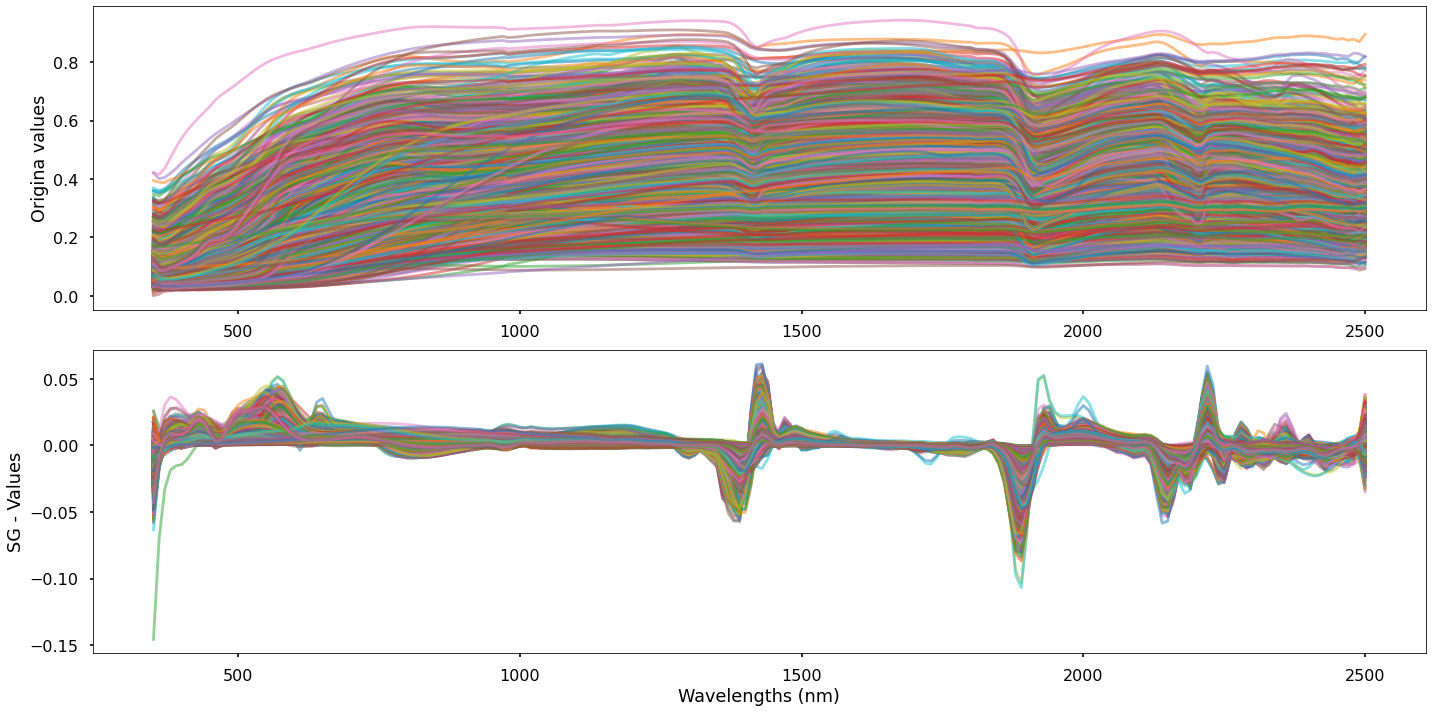

In [40]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(20, 10))
    ax1 = plt.subplot(211)
    ax1.plot(wavelengths, df[wavebands].values.T, alpha=0.5)
    ax1.set_ylabel("Origina values")
    
    ax2 = plt.subplot(212, sharex=ax1)
    ax2.plot(wavelengths, X.T, alpha=0.5)
    ax2.set_xlabel("Wavelengths (nm)")
    ax2.set_ylabel("SG - Values")

    plt.tight_layout()
    plt.plot()

# Splitting data into train/valid/test sets

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=1/9, random_state=42)
print(len(X_train), len(X_valid), len(X_test))

3070 384 384


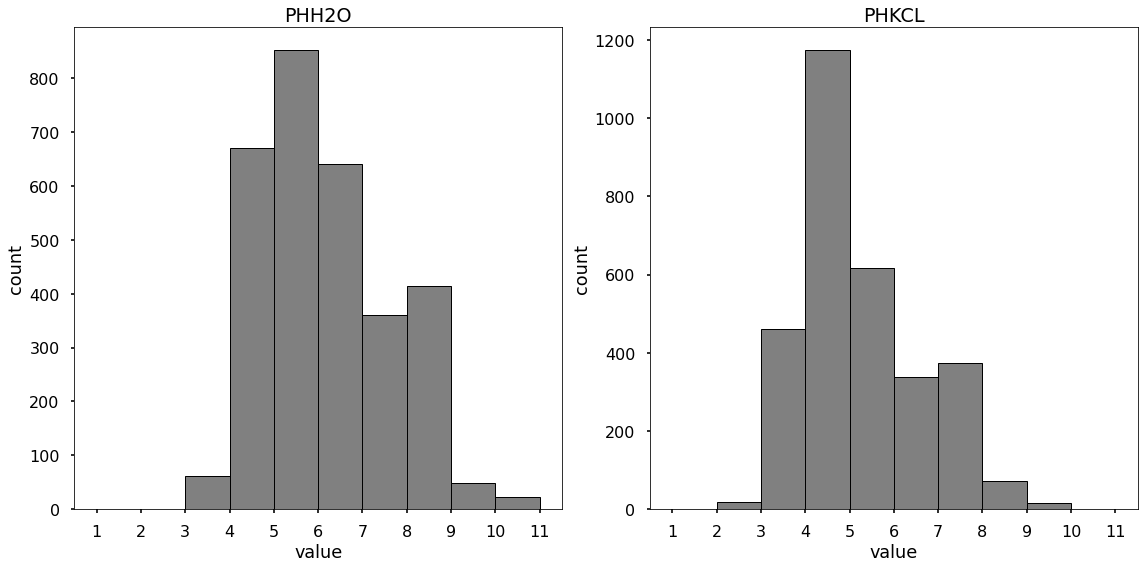

In [43]:
# Plot the outputs and see how they are
ncols=2
with plt.style.context('seaborn-poster'):
    fig, axes = plt.subplots(ncols=ncols, nrows=1, figsize=(16, 8))
    for ncol in range(ncols):
        idx = ncol
        if idx < len(variables):
            axes[ncol].hist(y_train[:, idx], bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], color = "gray", lw=1, ec='black')
            axes[ncol].set_title(variables[idx])
            axes[ncol].set_xlabel('value')
            axes[ncol].set_ylabel('count')
            axes[ncol].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
    plt.tight_layout()
    plt.plot()

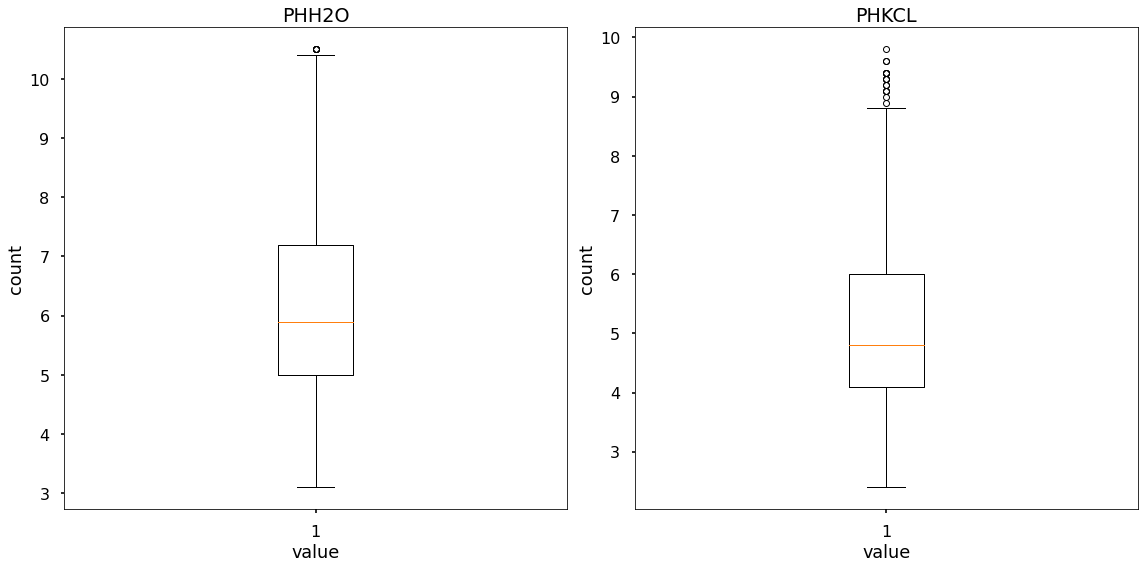

In [44]:
ncols=2
with plt.style.context('seaborn-poster'):
    fig, axes = plt.subplots(ncols=ncols, nrows=1, figsize=(16, 8))
    for ncol in range(ncols):
        idx = ncol
        if idx < len(variables):
            axes[ncol].boxplot(y_train[:, idx])
            axes[ncol].set_title(variables[idx])
            axes[ncol].set_xlabel('value')
            axes[ncol].set_ylabel('count')
    plt.tight_layout()
    plt.plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


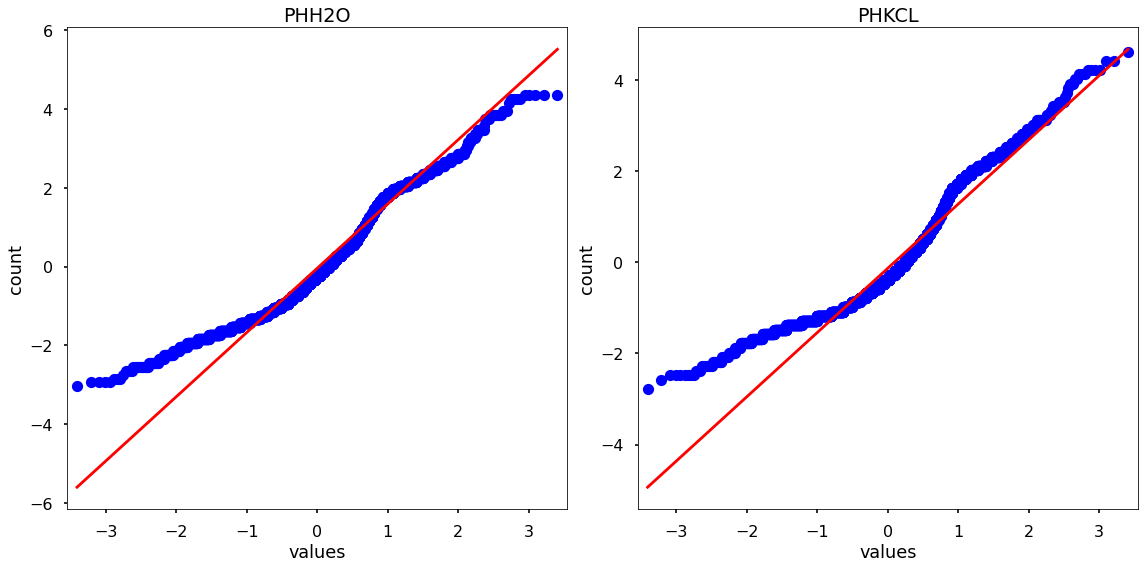

In [45]:
import statsmodels.api as sm
# Plot the outputs and see how they are
ncols=2
with plt.style.context('seaborn-poster'):
    fig, axes = plt.subplots(ncols=ncols, nrows=1, figsize=(16, 8))
    for ncol in range(ncols):
        idx = ncol
        if idx < len(variables):
            sm.qqplot(y_train[:, idx] - np.mean(y_train[:, idx]), line='q', ax=axes[ncol])
            axes[ncol].set_title(variables[idx])
            axes[ncol].set_xlabel('values')
            axes[ncol].set_ylabel('count')
    plt.tight_layout()
    plt.plot()

# Define evaluation metrics

In [46]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
def evaluate(y_true, y_pred):
    mse = np.array([mean_squared_error(y_true[:, idx], y_pred[:,idx]) for idx in range(len(y_true[0]))])
    r2 = np.array([r2_score(y_true[: ,idx], y_pred[:, idx]) for idx in range(len(y_true[0]))])
    rpd = y_true.std()/np.sqrt(mse)
    return mse, r2, rpd

def evaluate_model(model, X, y):
    pred = model.predict(X)
    if(tf.is_tensor(pred)):
        pred = pred.numpy()
        
    return pred, evaluate(y.squeeze(), pred.squeeze())

In [48]:
def evaluate_and_plot(X, y, model):
    y_pred, (mse, r2, rpd) = evaluate_model(model, X, y)
    with plt.style.context('seaborn-poster'):
        fig, axes = plt.subplots(ncols=ncols, nrows=1, figsize=(16, 8))
        for var_idx in range(len(variables)):
            title = f'{variables[var_idx]}, MSE: {np.round(mse[var_idx], 2)}, R2: {np.round(r2[var_idx], 2)}, RPD: {np.round(rpd[var_idx], 2)}'
            # Print the result
            print('MSE: %0.4f' % (mse[var_idx]))
            print('R2: %0.4f' % (r2[var_idx]))
            print('RPD: %0.4f' % (rpd[var_idx]))
            # plot the regression
            p = np.polyfit(y[:, var_idx], y_pred[:, var_idx], deg=1)
            axes[var_idx].scatter(y[:, var_idx], y_pred[:, var_idx], color='gray', edgecolors='black', alpha=0.5)
            axes[var_idx].plot(y[:, var_idx], y[:, var_idx], '-k', label='Expectation')
            axes[var_idx].plot(y[:, var_idx], np.polyval(p, y[:, var_idx]),'-.k', label='Prediction regression')
            axes[var_idx].legend()
            axes[var_idx].set_xlabel('Actual')
            axes[var_idx].set_ylabel('Predicted')
            axes[var_idx].set_title(title)
        plt.plot()
    return y_pred, mse, r2, rpd

# PLS Exploration

In [49]:
from sklearn.cross_decomposition import PLSRegression

In [50]:
# define a function to evaluate pls
def pls_evaluate_num_comp(X_train, y_train, X_valid, y_valid, num_comp):
    pls = PLSRegression(n_components=num_comp)
    pls.fit(X_train, y_train)
    y_valid_pred = pls.predict(X_valid)
    mse = mean_squared_error(y_valid_pred, y_valid)
    r2 = r2_score(y_valid_pred, y_valid)
    rpd = y_valid.std()/np.sqrt(mse)
    return (y_valid_pred, mse, r2, rpd)

In [51]:
# Try optimize the number of components (without variable selection) => we will use X1
def pls_evaluate_num_comps(X_train, y_train, X_valid, y_valid, num_comps):
    mses = []
    r2s = []
    rpds = []
    for num_comp in num_comps:
        _, mse, r2, rpd = pls_evaluate_num_comp(X_train, y_train, X_valid, y_valid, num_comp)
        mses.append(mse)
        r2s.append(r2)
        rpds.append(rpd)
    return (mses, r2s, rpds)

In [52]:
def plot_metric(scores, objective, yLabel):
    with plt.style.context('seaborn-poster'):
        plt.plot(num_comps, scores, '-o', color='gray', alpha=0.5)
        idx = np.argmin(scores) if objective == 'min' else np.argmax(scores)
        plt.plot(num_comps[idx], scores[idx], 'P', color='red', ms=10)
        plt.xlabel("Number of components")
        plt.ylabel(yLabel)
    plt.show()
    return (num_comps[idx], scores[idx])

In [53]:
def pls_evaluate_plot_num_comps(X_train, y_train, X_valid, y_valid, num_comps):
    mses, r2s, rpds = pls_evaluate_num_comps(X_train, y_train, X_valid, y_valid, num_comps)
    # Plot mses
    num_comp, mse = plot_metric(mses, 'min', 'MSE')
    print(f'The best mse is {mse} with {num_comp} PLS components')

/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning: X scores are null at iteration 214
  warnings.warn('X scores are null at iteration %s' % k)


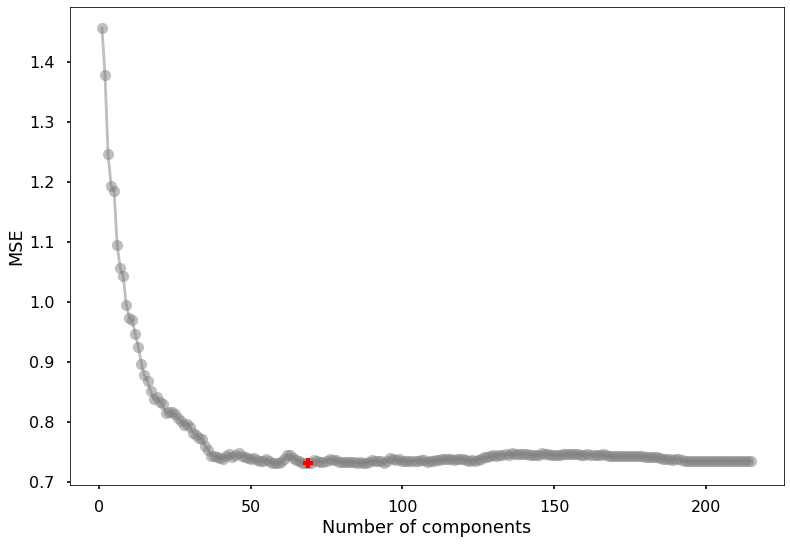

The best mse is 0.730446809424657 with 69 PLS components


In [54]:
# test with the first few components and choose the best
num_comps = np.arange(1, 216)
pls_evaluate_plot_num_comps(X_train, y_train, X_valid, y_valid, num_comps)

# Selected number of PLS components
For reflectance data it is 72, and for SG it is 69 

In [55]:
best_pls_components = 69 #72
# Fit
pls = PLSRegression(n_components=best_pls_components)
pls.fit(X_train, y_train)

PLSRegression(copy=True, max_iter=500, n_components=69, scale=True, tol=1e-06)

MSE: 0.7235
R2: 0.6340
RPD: 1.6825
MSE: 0.7222
R2: 0.5670
RPD: 1.6841


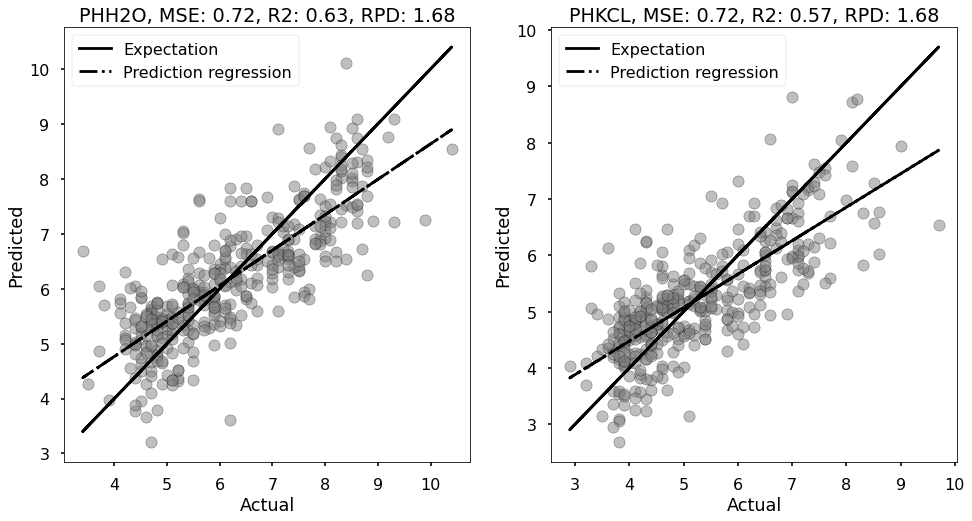

In [56]:
# evaluate on the test set
_ = evaluate_and_plot(X_test, y_test, pls)

In [58]:
def plot_spectra_vs_pls_coefficients(X, wl,num_comp, yLabel):
    # Define the PLS regression object
    pls = PLSRegression(n_components=num_comp)
    # Fit data
    pls.fit(X, y)
    # Plot spectra
    plt.figure(figsize=(16, 8))
    with plt.style.context('seaborn-poster'):
        ax1 = plt.subplot(211)
        plt.plot(wl, X.T)
        plt.ylabel(yLabel)

        ax2 = plt.subplot(212, sharex=ax1)
        plt.scatter(wl, np.abs(pls.coef_[:, 0]), color='gray', edgecolors='black', alpha=0.5)

        plt.xlabel("Wavelength (nm)")
        plt.ylabel("PLS coefficients (abs.)")

        plt.show()

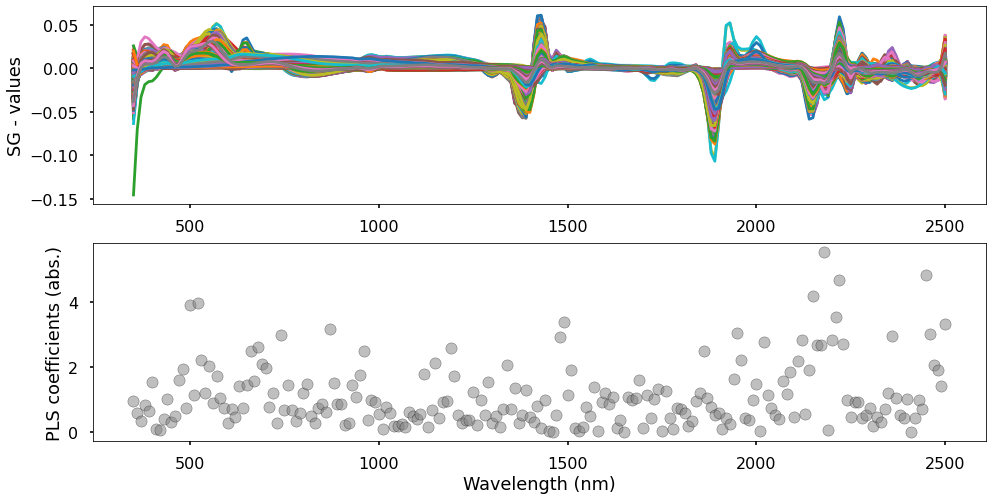

In [59]:
plot_spectra_vs_pls_coefficients(X, wavelengths, best_pls_components, "SG - values")

# PLS With Variable Selection


In [ ]:
# def sort_variable(X, y, num_comp):
#      # Use PLS using full spectrum (all the wavelengths)
#     pls1 = PLSRegression(n_components=num_comp)
#     pls1.fit(X, y)
#     # Sort the wavelengths by the coefficients
#     sorted_ind = np.argsort(np.abs(pls1.coef_[:, 0]))
#     # Sort the spectra accordingly
#     return sorted_ind

In [ ]:
# def pls_evaluate_variable(X, y, X_valid, y_valid, num_comp):
#     # Array of MSE each time we reduce a wavelength
#     mses = np.array([float('inf') for _ in range(X.shape[1])]) # Array of elements (each time we reduce one, but we can't reduce the number of components to smaller than num_comp, thus there will be maximum values for num_comp elements at the end)
#     r2s =  np.array([float('-inf') for _ in range(X.shape[1])]) # R2 objective is to maximize (as close to 1 as possible) so the default value is set to -inf
#     rpds = np.array([float('-inf') for _ in range(X.shape[1])]) # RPD objective is to maximize (as big as possible) so the default value is set to -inf
    
#     # Sort the spectra accordingly
#     sorted_ind = sort_variable(X, y, num_comp)
#     Xc, Xv = X[:, sorted_ind], X_valid[:, sorted_ind]
#     # Discard wavelength one at a time (but the remained number of wavelengths must be >= num_comp)
#     for num_discarded in range(Xc.shape[1] - num_comp):
#         Xn = Xc[:, num_discarded:]
#         Xn_valid = Xv[:, num_discarded:]
#         _, mse, r2, rpd = pls_evaluate_num_comp(Xn, y, Xn_valid, y_valid, num_comp)

#         mses[num_discarded] = mse
#         r2s[num_discarded] = r2
#         rpds[num_discarded] = rpd
#     return (mses, r2s, rpds)

In [ ]:
# # Helper function
# def find_min_2d_indices(x):
#     '''
#     Find the min index from a 2D array and gives row and column indices for the min element
#     Parameters:
#         x: the 2D array
#     Returns:
#         (iIdx, jIdx): iIdx is the row index and jIdx is the column index
#     Test:
#     >>> find_min_2d_indices(np.array([[1, 2, 3], [1, 0, 1], [2, 2, 4]]))
#     (1, 1)
#     '''
#     idx = np.argmin(x)
#     iIdx = idx//x.shape[1]
#     jIdx = idx - iIdx * x.shape[1]
#     return (iIdx, jIdx)
# # Helper function
# def find_max_2d_indices(x):
#     '''
#     Find the max index from a 2D array and gives row and column indices for the min element
#     Parameters:
#         x: the 2D array
#     Returns:
#         (iIdx, jIdx): iIdx is the row index and jIdx is the column index
#     Test:
#     >>> find_max_2d_indices(np.array([[1, 2, 3], [1, 0, 1], [2, 2, 4]]))
#     (2, 2)
#     '''
#     idx = np.argmax(x)
#     iIdx = idx//x.shape[1]
#     jIdx = idx - iIdx * x.shape[1]
#     return (iIdx, jIdx)

In [ ]:
# # Now we evaluate the different PLS with different number of components and different number of variables and collect all the data back
# def evaluate_with_different_num_comps(X, y, X_valid, y_valid, num_comps):
#     comp_mses = [] # array of array of mses (first dimension is for the number of components, second dimension is for all different )
#     comp_r2s = [] # similar to mse for r2
#     comp_rpds = [] # similar to mse for rpd
#     for num_comp in num_comps:
#         mses, r2s, rpds = pls_evaluate_variable(X, y, X_valid, y_valid, num_comp)
#         comp_mses.append(mses)
#         comp_r2s.append(r2s)
#         comp_rpds.append(rpds)
#     comp_mses = np.array(comp_mses)
#     comp_r2s = np.array(comp_r2s)
#     comp_rpds = np.array(comp_rpds)
#     return (comp_mses,comp_r2s, comp_rpds)

In [ ]:
# def print_metric_info(comp_mses, comp_r2s, comp_rpds):
#     # considering comp_mses
#     min_mse_i, min_mse_j = find_min_2d_indices(comp_mses)
#     print(f'Min MSE: component index: {min_mse_i}, variable cut-off index: {min_mse_j}, Components: {num_comps[min_mse_i]}, MSE: {comp_mses[min_mse_i][min_mse_j]}')

#     # considering r2s => objective is to maximize r2
#     max_r2_i, max_r2_j = find_max_2d_indices(comp_r2s)
#     print(f'Max R2: component index: {max_r2_i}, variable cut-off index: {max_r2_j}, Components: {num_comps[max_r2_i]}, R2: {comp_r2s[max_r2_i][max_r2_j]}')
    
#     # considering rpds => objective is to maximize rpds
#     max_rpd_i, max_rpd_j = find_max_2d_indices(comp_rpds)
#     print(f'Max RPD: component index: {max_rpd_i}, variable cut-off index: {max_rpd_j}, Components: {num_comps[max_rpd_i]}, RPD: {comp_rpds[max_rpd_i][max_rpd_j]}')

In [ ]:
# def find_best_components_variables(X, y, X_valid, y_valid, num_comps):
#     comp_mses, comp_r2s, comp_rpds = evaluate_with_different_num_comps(X, y, X_valid, y_valid, num_comps)
#     print_metric_info(comp_mses, comp_r2s, comp_rpds)

In [ ]:
# num_comps = np.arange(1, 100)
# find_best_components_variables(X_train, y_train, X_valid, y_valid, num_comps)

# The best PLSR parameters are
Min MSE: component index: 95, variable cut-off index: 62, Components: 96, MSE: 0.7155695496989665 <br/>
Max R2: component index: 94, variable cut-off index: 71, Components: 95, R2: 0.43402109857395876 <br/>
Max RPD: component index: 95, variable cut-off index: 62, Components: 96, RPD: 1.7411917379862534 <br/>

In [ ]:
# def selective_pls(X, y, num_comp, num_discarded):
#     # Sort the variables based on the number of components
#     sorted_ind = sort_variable(X, y, num_comp)
#     Xc = X[:, sorted_ind]
#     # Select the variables using the cut off index (num_discarded)
#     Xn = Xc[:, num_discarded:]
#     pls = PLSRegression(n_components=num_comp)
#     pls.fit(Xn, y)
#     return sorted_ind,  pls

In [ ]:
# num_comp = 95
# cut_off_index = 62
# sorted_ind, pls = selective_pls(X, y, num_comp=num_comp, num_discarded = cut_off_index)

In [ ]:
# X_v = X_valid[:, sorted_ind][:, cut_off_index:]
# _ = evaluate_and_plot(X_v, y_valid, pls)

In [ ]:
# X_t = X_test[:, sorted_ind][:, cut_off_index:]
# _ = evaluate_and_plot(X_t, y_test, pls)

# Now explore with Random Forest

In [60]:
import itertools
from sklearn.ensemble import RandomForestRegressor

In [61]:
def holdout_grid_search(clf, X_train, y_train, X_valid, y_valid, hyperparams, fixed_hyperparams={}):

    all_mses = []
    best_estimator = None
    best_hyperparams = {}
    
    # hold best running score
    best_score = 1000 # set to a very big value

    # get list of param values
    lists = hyperparams.values()
    
    # get all param combinations
    param_combinations = list(itertools.product(*lists))
    total_param_combinations = len(param_combinations)

    # iterate through param combinations
    for i, params in enumerate(param_combinations, 1):
        # fill param dict with params
        param_dict = {}
        for param_index, param_name in enumerate(hyperparams):
            param_dict[param_name] = params[param_index]
            
        # create estimator with specified params
        estimator = clf(**param_dict, **fixed_hyperparams)

        # fit estimator
        estimator.fit(X_train, y_train)
        
        # get predictions on validation set
        preds = estimator.predict(X_valid)
        
        # compute cindex for predictions
        estimator_score = mean_squared_error(y_valid, preds)
        all_mses.append(estimator_score)

        print(f'[{i}/{total_param_combinations}] {param_dict}')
        print(f'Val MSE: {estimator_score}\n')

        # if new low score, update low score, best estimator
        # and best params 
        if estimator_score < best_score:
            best_score = estimator_score
            best_estimator = estimator
            best_hyperparams = param_dict

    # add fixed hyperparamters to best combination of variable hyperparameters
    best_hyperparams.update(fixed_hyperparams)
    
    
    return all_mses, best_estimator, best_hyperparams

In [62]:
hyperparams = {
    'max_depth': [10, 20, 40, 80, 150, 200, 400, 500, 600, 700, 1000, 2000, 3000],
    'n_estimators': [50, 100, 200, 300, 1000]
}
fixed_hyperparams = {
    'random_state': 42
}
def random_forest_grid_search(X_train, y_train, X_valid, y_valid, hyperparams, fixed_hyperparams={}):
    # The random forest regressor
    rf = RandomForestRegressor
    # Search for the best random forest
    all_mses, best_rf, best_hyperparams = holdout_grid_search(rf, X_train, y_train, X_valid, y_valid, hyperparams, fixed_hyperparams)

    print(f"Best hyperparameters:\n{best_hyperparams}")
        
    # add fixed hyperparamters to best combination of variable hyperparameters
    best_hyperparams.update(fixed_hyperparams)
    
    return all_mses, best_rf, best_hyperparams

In [63]:
all_mses, best_rf, best_hyperparams = random_forest_grid_search(X_train, y_train, X_valid, y_valid, hyperparams, fixed_hyperparams=fixed_hyperparams)

[1/65] {'max_depth': 10, 'n_estimators': 50}
Val MSE: 0.5833143545188111

[2/65] {'max_depth': 10, 'n_estimators': 100}
Val MSE: 0.5808629591404519

[3/65] {'max_depth': 10, 'n_estimators': 200}
Val MSE: 0.5753999527419729

[4/65] {'max_depth': 10, 'n_estimators': 300}
Val MSE: 0.5757132781706473

[5/65] {'max_depth': 10, 'n_estimators': 1000}
Val MSE: 0.5729492386362893

[6/65] {'max_depth': 20, 'n_estimators': 50}
Val MSE: 0.5410684726641408

[7/65] {'max_depth': 20, 'n_estimators': 100}
Val MSE: 0.5427808618810618

[8/65] {'max_depth': 20, 'n_estimators': 200}
Val MSE: 0.5381102954550654

[9/65] {'max_depth': 20, 'n_estimators': 300}
Val MSE: 0.5385722092731448

[10/65] {'max_depth': 20, 'n_estimators': 1000}
Val MSE: 0.538157700590697

[11/65] {'max_depth': 40, 'n_estimators': 50}
Val MSE: 0.5480405113994499

[12/65] {'max_depth': 40, 'n_estimators': 100}
Val MSE: 0.5432300542108979

[13/65] {'max_depth': 40, 'n_estimators': 200}
Val MSE: 0.5441168009335333

[14/65] {'max_depth': 4

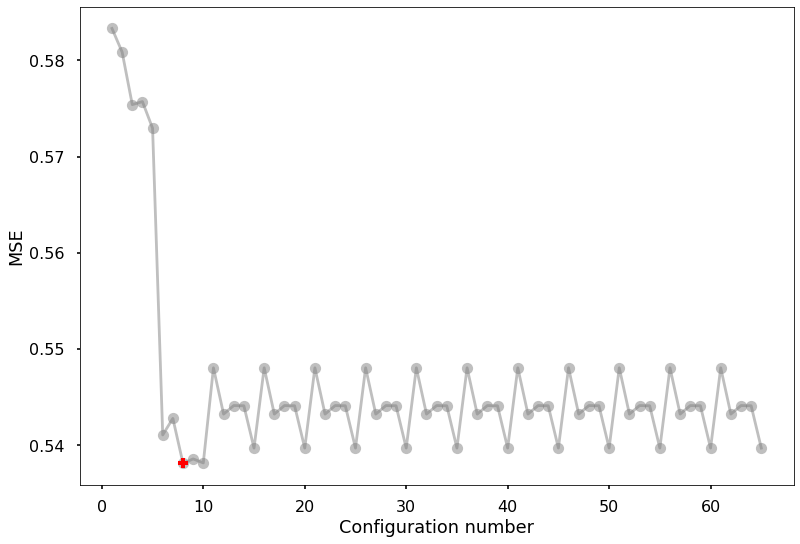

(8, 0.5381102954550654)

In [64]:
def plot_rf_metric(scores, objective, yLabel):
    with plt.style.context('seaborn-poster'):
        num_configs = np.arange(1, len(scores)+1)
        plt.plot(num_configs, scores, '-o', color='gray', alpha=0.5)
        idx = np.argmin(scores) if objective == 'min' else np.argmax(scores)
        plt.plot(num_comps[idx], scores[idx], 'P', color='red', ms=10)
        plt.xlabel("Configuration number")
        plt.ylabel(yLabel)
    plt.show()
    return (num_configs[idx], scores[idx])
plot_rf_metric(all_mses, 'min', 'MSE')

# Best RF parameters
For SG data:
best_hyperparams = {'max_depth': 20, 'n_estimators': 1000, 'random_state': 42}

For Reflectance data:
Best hyperparameters:
{'max_depth': 40, 'n_estimators': 1000, 'random_state': 42}

In [65]:
best_hyperparams = {'max_depth': 20, 'n_estimators': 1000, 'random_state': 42} # {'max_depth': 40, 'n_estimators': 1000, 'random_state': 42}

best_rf = RandomForestRegressor(**best_hyperparams)
best_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

MSE: 0.4595
R2: 0.7676
RPD: 2.1113
MSE: 0.4572
R2: 0.7259
RPD: 2.1166


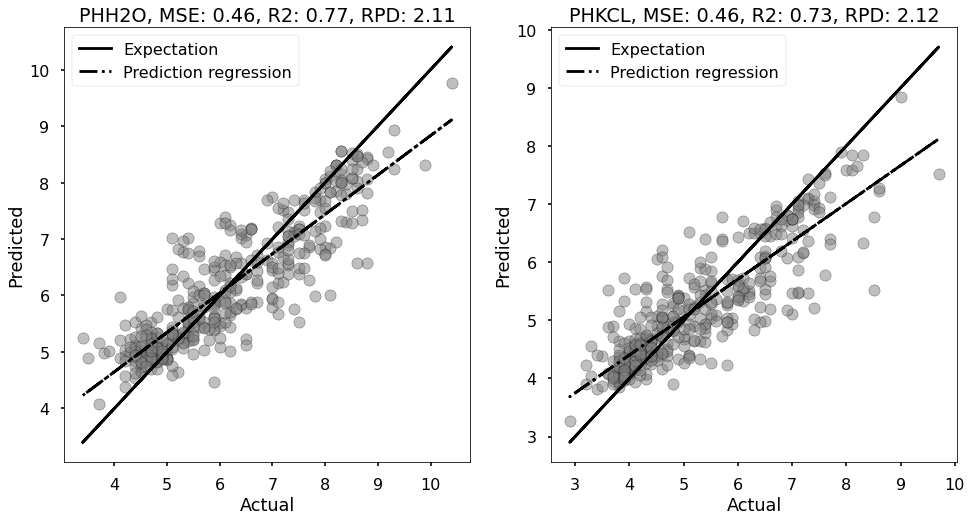

In [66]:
# evaluate on the test set
_ = evaluate_and_plot(X_test, y_test, best_rf)

In [67]:
def plot_spectra_vs_rf_feature_importance(X, wl, rf):
    # Plot spectra
    plt.figure(figsize=(16, 8))
    with plt.style.context('seaborn-poster'):
        ax1 = plt.subplot(211)
        plt.plot(wl, X.T)
        plt.ylabel("SG - Values")

        ax2 = plt.subplot(212, sharex=ax1)
        plt.scatter(wl, rf.feature_importances_, color='gray', edgecolors='black', alpha=0.5)

        plt.xlabel("Wavelength (nm)")
        plt.ylabel("RF feature importances")

        plt.show()

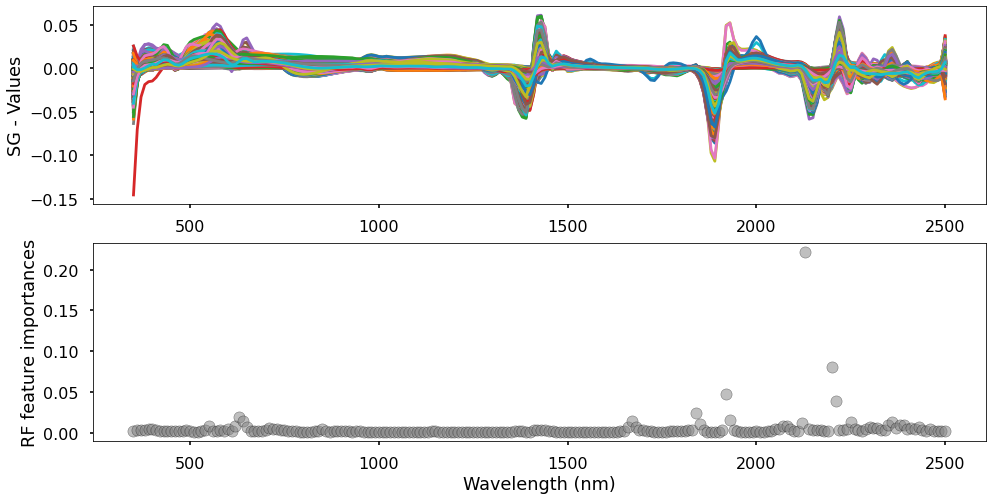

In [68]:
plot_spectra_vs_rf_feature_importance(X_train, wavelengths, best_rf)